In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from https://salaries.texastribune.org/texas-am-university/

salaries = pd.read_csv('data/am2016.csv')
print(salaries)

                           MbrName         LastName  FirstName MiddleInitial  \
0      Prairie View A&M University            ABBAS      SADAF           NaN   
1      Prairie View A&M University           ABBASI     HASSAN             N   
2      Prairie View A&M University            ABBEY        JOE           NaN   
3      Prairie View A&M University            ABIBO     IBUOMI           NaN   
4      Prairie View A&M University    ABROM-JOHNSON  TENEINGER           NaN   
5      Prairie View A&M University            ADAMS      BETTY             N   
6      Prairie View A&M University            ADAMS      HARRY             W   
7      Prairie View A&M University            ADAMS    JASMINE             M   
8      Prairie View A&M University            ADAMS     SAMUEL             N   
9      Prairie View A&M University            ADAMS     THOMAS             L   
10     Prairie View A&M University  ADAMS-MCCLENNON    CHANDRA             C   
11     Prairie View A&M University      

In [2]:
from datetime import date

# Grab specific factors + transform
data = pd.DataFrame()
data['Title'] = salaries.ShortTitleDesc
data['Dep'] = salaries.ShortAdlocDesc
data['Eth'] = salaries.EEOMinorityCode
data['Sex'] = salaries.Sex
data['Days']= (date(2016, 12, 1) - pd.to_datetime(salaries.CurrEmplDate)).apply(lambda x: x.days)
data['Type'] = salaries.StudentStaffFaculty
data['FullPart'] = salaries.FullorPartTime
data['NormSal'] = 12*salaries.BudgetedSalary/salaries.AnnualTermMonths

data.head()

,Title,Dep,Eth,Sex,Days,Type,FullPart,NormSal
0,ADJUNCT INSTRUCTOR,COLL OF NURSING CLIN,4.0,F,686,3,P,16128.0
1,INFO RESOURCE SUP,INFORMATION RESOURCE,4.0,M,2757,2,F,70751.0
2,ASST COACH,ATHLETIC ADMIN.,1.0,M,61,2,F,40002.0
3,SPEC WEB CONTENT,ADLOC COOP EXTENSION,2.0,M,1385,2,F,53974.0
4,INSTRUCTOR,AG. NUTR & HUMAN ECO,2.0,F,9481,3,F,60356.0


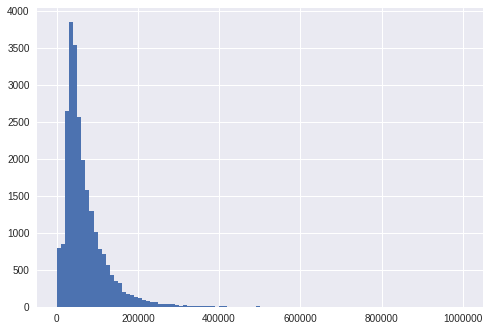

In [3]:
data.NormSal.hist(bins=100)
plt.show()

In [4]:
print('Different job titles: ', len(data.Title.unique()))
title_words = [word for title in data.Title.unique() for word in title.split()]

print('Different department names: ', len(data.Dep.unique()))
dep_words = [word for dep in data.Dep.unique() for word in dep.split()]

print('Different sexes: ', data.Sex.unique())
print('Different ethnicities: ', data.Eth.unique())
print('Different  times: ', data.FullPart.unique())

Different job titles:  4516
Different department names:  1280
Different sexes:  ['F' 'M']
Different ethnicities:  [  4.   1.   2.   3.  nan   7.   8.   5.   6.]
Different  times:  ['P' 'F']


There are too many job titles and department names, so we need to choose the most populous ones to consider.

Sex, ethnicity, and full/part-time all seem to have proper data. Need to check for outliers in the continuous data.

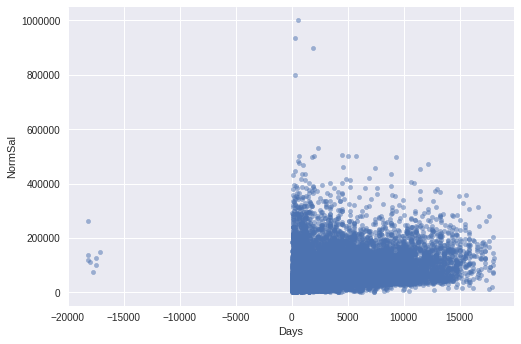

In [5]:
plt.clf()
data.plot.scatter('Days', 'NormSal', alpha=.5)
plt.show()

In [6]:
data.query('Days < 0')

,Title,Dep,Eth,Sex,Days,Type,FullPart,NormSal
9762,BUS COORDINATOR III,MARKETING & COMM,1.0,F,-17706,2,F,76069.000000
14063,PROFESSOR,PSYCHOLOGY,1.0,M,-17974,3,F,110424.000000
14244,PROFESSOR,CIVIL ENGINEERING,1.0,M,-17075,3,F,147896.000000
14400,PROFESSOR,ARCHITECTURE,1.0,M,-18171,3,F,138497.333333
16563,PROFESSOR,CHEMISTRY,1.0,M,-18171,3,F,262776.000000
17035,DIRECTOR,MARKETING & COMM,1.0,M,-18190,2,F,118212.000000
21860,PROFESSOR,COLL/ARTS & SCIENCES,1.0,M,-17441,3,F,126884.000000
24494,PROFESSOR,LIFE EARTH & ENV SCI,1.0,M,-17441,3,F,100710.666667


We'll remove the 8 outliers with faulty Days employed data.

In [7]:
data = data.query('Days > 0')

## Deciding What Variable Values to Include

#### By Title first then by Department

In [8]:
title_grouped = data.groupby('Title')
considered_titles = [group for group in title_grouped.groups if (len(title_grouped.groups[group]) > 50)]
print(considered_titles)

['ACADEMIC ADVISOR II', 'ADJ ASST PROF', 'ADJUNCT FACULTY', 'ADJUNCT INSTRUCTOR', 'ADMIN ASST II', 'ADMIN ASST III', 'ADMIN COORDINATOR', 'ADMINISTRATIVE AST', 'ASSISTANT DIRECTOR', 'ASSISTANT PROF', 'ASSISTANT PROFESSOR', 'ASSOC PROFESSOR', 'ASSOC RES SCIENTIST', 'ASSOCIATE DIRECTOR', 'ASSOCIATE PROF', 'ASSOCIATE PROFESSOR', 'ASST COACH', 'ASST PROFESSOR', 'ASST RES SCIENTIST', 'BUS ADMINISTRATOR I', 'BUS COORDINATOR I', 'BUS COORDINATOR II', 'CEA - 4H YD', 'CEA - AG/NR', 'CEA - FCS', 'CLINICAL ASSOC PROF', 'CLINICAL ASST PROF', 'COMMUNICATIONS SPEC', 'DIRECTOR', 'DISTINGUISHED PROF', 'EXT ASST', 'EXT PROG SPEC I', 'INSTRUCT ASSOC PROF', 'INSTRUCT ASST PROF', 'INSTRUCTOR', 'LECTURER', 'LECTURER I', 'MANAGER', 'OFFICE ASSOCIATE', 'PART-TIME INSTRUCTOR', 'POLICE OFFICER', 'POSTDOC RES ASSC', 'POSTDOC RES ASSOC', 'PROF ASST PROF', 'PROFESSOR', 'PROFESSOR AND HEAD', 'PROGRAM ASSISTANT', 'PROGRAM COORD', 'PROGRAM COORDINATOR', 'PROGRAM MANAGER', 'RES ASST PROF', 'RESEARCH ASSISTANT', 'RESE

In [9]:
data_filter_titles = data[data.Title.isin(considered_titles)]
dep_grouped = data_filter_titles.groupby('Dep')

considered_deps = [group for group in dep_grouped.groups if (len(dep_grouped.groups[group]) > 50)]
print(considered_deps)

['AG ECONOMICS', 'ANIMAL SCIENCE', 'ATHLETIC DIRECTOR', 'BIOCHEM & BIOPHYSICS', 'BIOLOGY', 'CELA', 'CHEMISTRY', 'CIVIL ENGINEERING', 'CLA FACULTY', 'COLL OF NURSING CLIN', 'COLLEGE OF BUSINESS', 'COLLEGE OF EDUCATION', 'COLLEGE OF NURSING', 'COMMUNICATION', 'COMPUTER SCIENCE', 'CURRICULUM/INSTRUCT', 'EDU & LEAD PREP', 'EDUCATIONAL PSYCHOLO', 'ELECTRICAL ENGR', 'ENGLISH', 'ENTOMOLOGY', 'HEALTH & KINESIOLOGY', 'HISTORY', 'LIBRARIES', 'MANAGEMENT', 'MATHEMATICS', 'MECHANICAL ENGR', 'MOLECULAR & CELL MED', 'MUSIC', 'PHARMACY - INSTRUCT', 'PHYSICS & ASTRONOMY', 'POLITICAL SCIENCE', 'PSYCH, SPEC ED & COU', 'PSYCHOLOGY', 'QATAR CAMPUS', 'SOCIAL SCIENCES', 'SOIL & CROP SCIENCE', 'TAMU SCHOOL OF LAW', 'TEACHING, LEARNING', 'UNIVERSITY POLICE', 'VET INTEGRATIVE BIOS', 'VET MED PATHOBIOLOGY', 'VET MED SMALL ANIMAL', 'VET MED-TEACHING HOS', 'WILDLIFE SERVICES']


In [10]:
data_filter = data_filter_titles[data_filter_titles.Dep.isin(considered_deps)]
title_full_grouped = data_filter.groupby('Title')
considered_titles = [group for group in title_full_grouped.groups if (len(title_full_grouped.groups[group]) > 100)]
print(considered_titles)
dep_full_grouped = data_filter.groupby('Dep')
considered_deps = [group for group in dep_full_grouped.groups if (len(dep_full_grouped.groups[group]) > 100)]
print(considered_deps)

['ADJUNCT FACULTY', 'ADJUNCT INSTRUCTOR', 'ASSISTANT PROFESSOR', 'ASSOCIATE PROFESSOR', 'CLINICAL ASST PROF', 'LECTURER', 'POSTDOC RES ASSOC', 'PROFESSOR', 'WLDLF DMG MGT TECH']
['CHEMISTRY', 'CLA FACULTY', 'COLLEGE OF NURSING', 'HEALTH & KINESIOLOGY', 'MATHEMATICS', 'PHYSICS & ASTRONOMY', 'QATAR CAMPUS', 'WILDLIFE SERVICES']


In [11]:
data_filter_titles = data[data.Title.isin(considered_titles)]
data_filter_deps = data[data.Dep.isin(considered_deps)]
data_filter = data_filter_titles[data.Dep.isin(considered_deps)]
print('Length title filtered: ', len(data_filter_titles))
print('Length deps filtered: ', len(data_filter_deps))
print('Length both filtered: ', len(data_filter))

Length title filtered:  5568
Length deps filtered:  1422
Length both filtered:  700


/home/shlapo/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


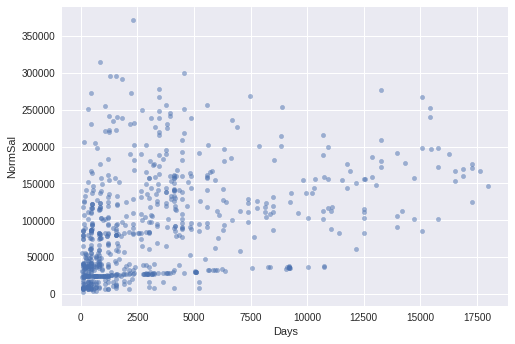

In [12]:
plt.clf()
data_filter.plot.scatter('Days', 'NormSal', alpha=.5)
plt.show()

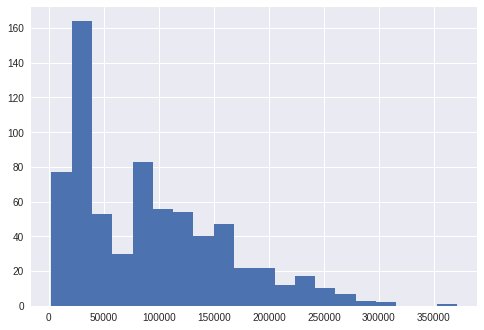

In [13]:
data_filter.NormSal.hist(bins=20)
plt.show()

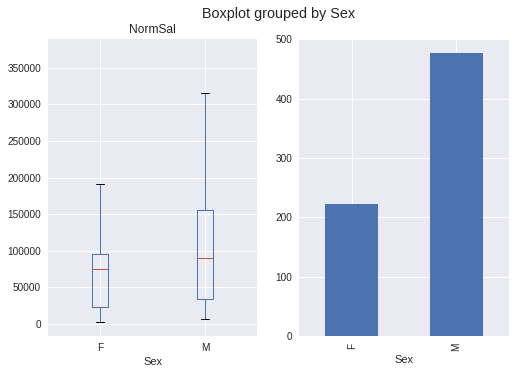

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)
data_filter.boxplot(column='NormSal', by='Sex', ax=ax1)
data_filter.groupby('Sex').count().Title.plot.bar(ax=ax2)
plt.show()

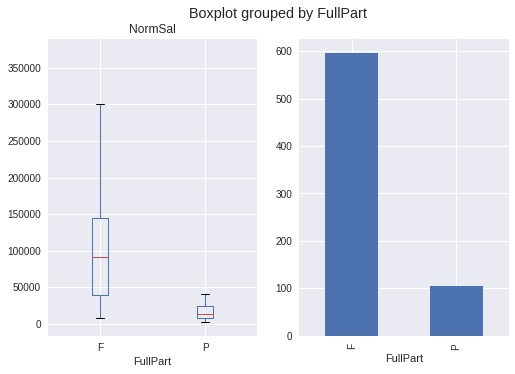

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2)
data_filter.boxplot(column='NormSal', by='FullPart', ax=ax1)
data_filter.groupby('FullPart').count().Title.plot.bar(ax=ax2)
plt.show()

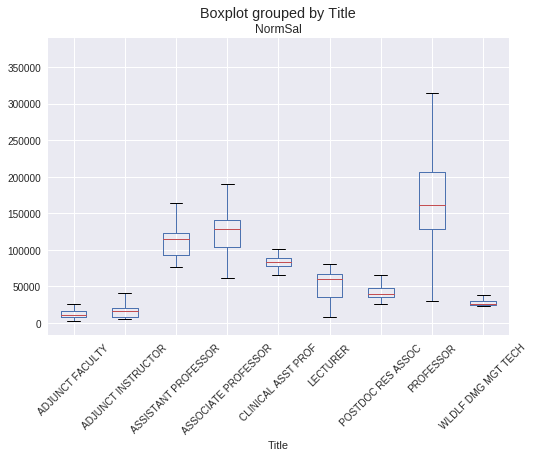

In [161]:
data_filter.boxplot(column='NormSal', by='Title')
plt.xticks(rotation=45)
plt.show()

In [131]:

data_filter[data_filter.Title == 'PROFESSOR'].boxplot(column='NormSal', by='Sex')
data_filter[data_filter.Title== 'PROFESSOR'].groupby('Dep').describe().NormSal
# plt.show()

,count,mean,std,min,25%,50%,75%,max
Dep,,,,,,,,
CHEMISTRY,19.0,185284.167811,58822.254751,77437.333333,146953.333333,166512.000000,238141.333333,277196.000000
CLA FACULTY,21.0,104653.904762,10935.424073,87242.666667,94728.000000,105624.000000,114604.000000,119456.000000
COLLEGE OF NURSING,5.0,118748.000000,51873.588039,30456.000000,125000.000000,130952.000000,140600.000000,166732.000000
HEALTH & KINESIOLOGY,17.0,147588.825836,51424.067308,62838.666667,123782.666667,137278.666667,166925.333333,291970.666667
MATHEMATICS,53.0,169834.500410,42115.979917,91196.000000,151224.000000,161556.521739,191472.000000,314940.000000
PHYSICS & ASTRONOMY,38.0,168873.315027,34656.069278,102945.333333,148115.333333,162010.666667,179312.333333,272482.666667
QATAR CAMPUS,31.0,238361.075269,44623.762425,119009.333333,222196.666667,238109.333333,252973.333333,371202.666667


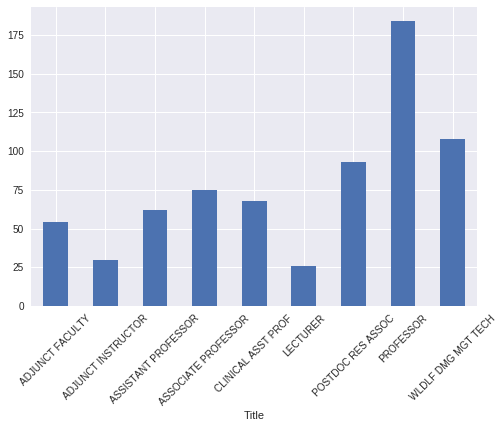

In [17]:
data_filter.groupby('Title').count().Sex.plot.bar()
plt.xticks(rotation=45)
plt.show()

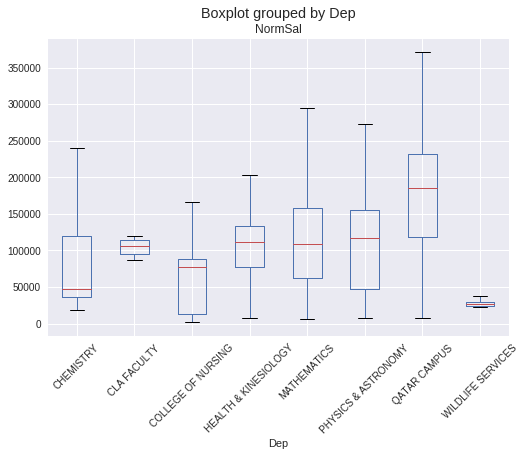

In [18]:
data_filter.boxplot(column='NormSal', by='Dep')
plt.xticks(rotation=45)
plt.show()

In [19]:
data_filter.groupby('Sex').groups

{'F': Int64Index([   22,   448,   494,   511,   948,  1474,  1481,  1549,  2087,
              2208,
             ...
             21237, 21247, 21248, 21257, 21270, 21322, 21337, 21342, 21650,
             21941],
            dtype='int64', length=223),
 'M': Int64Index([  173,   196,   238,   253,   594,   654,   665,   720,   797,
               868,
             ...
             21056, 21105, 21123, 21252, 21280, 21282, 21381, 21625, 22308,
             24503],
            dtype='int64', length=477)}

## ANOVA

In [20]:

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = 'NormSal ~ C(Sex)*C(Title)*C(Dep)*Days + C(FullPart)'

full_model = ols(formula, data=data_filter).fit()
aov_table = anova_lm(full_model, typ=1)
print(aov_table)
print('Bonferroni Correction p-value: ', .05/16)

                                df        sum_sq       mean_sq           F  \
C(Sex)                         1.0  1.825500e+11  1.825500e+11  311.143400   
C(Title)                       8.0  2.397624e+12  2.997030e+11  510.822264   
C(Dep)                         7.0  2.934393e+11  4.191990e+10   71.449471   
C(FullPart)                    1.0  2.875742e+10  2.875742e+10   49.014966   
C(Sex):C(Title)                8.0  1.505734e+10  1.882168e+09    3.208020   
C(Sex):C(Dep)                  7.0  1.316685e+10  1.880978e+09    3.205992   
C(Title):C(Dep)               56.0  6.729333e+10  1.201667e+09    2.048155   
C(Sex):C(Title):C(Dep)        56.0  1.117943e+10  1.996327e+08    0.340260   
Days                           1.0  1.680510e+09  1.680510e+09    2.864309   
C(Sex):Days                    1.0  1.981585e+09  1.981585e+09    3.377470   
C(Title):Days                  8.0  5.425989e+09  6.782487e+08    1.156026   
C(Dep):Days                    7.0  7.240219e+09  1.034317e+09  

/home/shlapo/.anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [144]:
# SIGNIFICANT FORMULA
formula_single = 'C(Sex) + C(Title) + C(Dep) + C(FullPart)'
formula_double = 'C(Title):C(Dep)'
# C(Sex):C(Title) + C(Sex):C(Dep) are significant in the full model, but not in this one
sig_formula = 'NormSal ~ ' + ' + ' + formula_single + ' + ' + formula_double #  + ' + ' + formula_triple

sig_model = ols(sig_formula, data=data_filter).fit()
aov_table = anova_lm(sig_model, typ=1)
print(aov_table)

                    df        sum_sq       mean_sq           F         PR(>F)
C(Sex)             1.0  1.825500e+11  1.825500e+11  315.480404   5.726318e-58
C(Title)           8.0  2.397624e+12  2.997030e+11  517.942576  2.342387e-278
C(Dep)             7.0  2.894683e+11  4.135262e+10   71.465024   1.112820e-76
C(FullPart)        1.0  2.905727e+10  2.905727e+10   50.216374   3.549863e-12
C(Title):C(Dep)   56.0  8.315446e+10  1.484901e+09    2.566186   1.691461e-08
Residual         659.0  3.813246e+11  5.786413e+08         NaN            NaN


/home/shlapo/.anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/shlapo/.anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [80]:
sig_variables = ['Sex', 'Title', 'Dep', 'FullPart']
p_values = sig_model.pvalues
p_adj = .05/len(p_values)
print('Adjusted p-value: ', .05/len(p_values))
print(p_values[p_values < p_adj])

Adjusted p-value:  0.0006756756756756757
Intercept                                                     1.544928e-11
C(Title)[T.ASSISTANT PROFESSOR]                               1.945296e-04
C(Title)[T.ASSOCIATE PROFESSOR]                               4.328177e-05
C(Title)[T.PROFESSOR]                                         7.010562e-29
C(Title)[T.WLDLF DMG MGT TECH]                                9.084744e-05
C(Dep)[T.CLA FACULTY]                                         5.707833e-24
C(Dep)[T.QATAR CAMPUS]                                        2.243838e-07
C(Dep)[T.WILDLIFE SERVICES]                                   9.084744e-05
C(FullPart)[T.P]                                              1.894228e-13
C(Title)[T.PROFESSOR]:C(Dep)[T.CLA FACULTY]                   5.707833e-24
C(Title)[T.ASSOCIATE PROFESSOR]:C(Dep)[T.QATAR CAMPUS]        3.986402e-06
C(Title)[T.PROFESSOR]:C(Dep)[T.QATAR CAMPUS]                  6.514541e-04
C(Title)[T.WLDLF DMG MGT TECH]:C(Dep)[T.WILDLIFE SERVICES] 

In [150]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from math import factorial
from statsmodels.stats.libqsturng import psturng


print(MultiComparison(data_filter.NormSal, data_filter.Sex).tukeyhsd().summary(), '\n')
print(MultiComparison(data_filter.NormSal, data_filter.FullPart).tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD,FWER=0.05 
group1 group2  meandiff   lower      upper    reject
----------------------------------------------------
  F      M    34659.981 23918.3871 45401.5749  True 
---------------------------------------------------- 

   Multiple Comparison of Means - Tukey HSD,FWER=0.05  
group1 group2   meandiff    lower       upper    reject
-------------------------------------------------------
  F      P    -83028.4397 -96117.404 -69939.4754  True 
-------------------------------------------------------


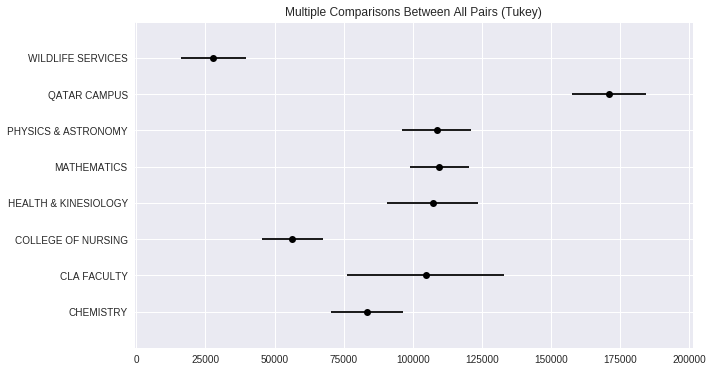

                   Multiple Comparison of Means - Tukey HSD,FWER=0.05                  
       group1               group2          meandiff      lower        upper     reject
---------------------------------------------------------------------------------------
     CHEMISTRY           CLA FACULTY       21086.812   -20359.0526   62532.6766  False 
     CHEMISTRY        COLLEGE OF NURSING  -27147.2954  -51097.0032   -3197.5877   True 
     CHEMISTRY       HEALTH & KINESIOLOGY  23650.7845   -5946.2663   53247.8354  False 
     CHEMISTRY           MATHEMATICS       26147.7752   2564.3123    49731.2382   True 
     CHEMISTRY       PHYSICS & ASTRONOMY   25074.6552   -381.9512    50531.2615  False 
     CHEMISTRY           QATAR CAMPUS      87573.9697   61080.7405   114067.199   True 
     CHEMISTRY        WILDLIFE SERVICES   -55705.5372  -80366.1972  -31044.8772   True 
    CLA FACULTY       COLLEGE OF NURSING  -48234.1075  -88367.9638   -8100.2511   True 
    CLA FACULTY      HEALTH & KI

In [153]:
MultiComparison(data_filter.NormSal, data_filter.Dep).tukeyhsd().plot_simultaneous()
plt.show()
print(MultiComparison(data_filter.NormSal, data_filter.Dep).tukeyhsd().summary())

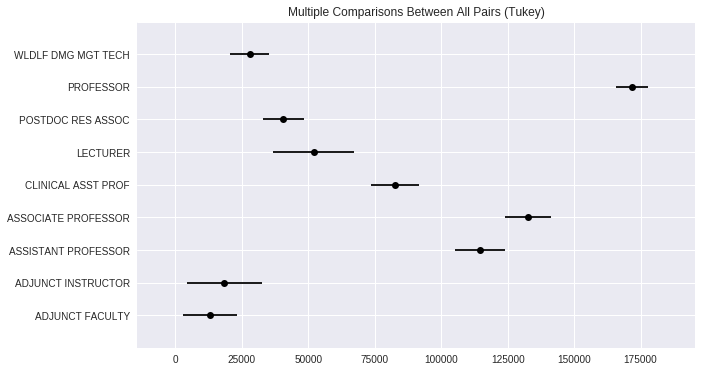

                 Multiple Comparison of Means - Tukey HSD,FWER=0.05                 
       group1              group2         meandiff      lower        upper    reject
------------------------------------------------------------------------------------
  ADJUNCT FACULTY    ADJUNCT INSTRUCTOR  5209.1556   -18759.0382   29177.3493 False 
  ADJUNCT FACULTY   ASSISTANT PROFESSOR 101536.2728   81943.7915  121128.7541  True 
  ADJUNCT FACULTY   ASSOCIATE PROFESSOR 119624.3956  100838.9926  138409.7985  True 
  ADJUNCT FACULTY    CLINICAL ASST PROF  69401.9438   50216.0626   88587.825   True 
  ADJUNCT FACULTY         LECTURER       38816.7105   13691.2164   63942.2046  True 
  ADJUNCT FACULTY    POSTDOC RES ASSOC   27476.8006   9468.4688    45485.1324  True 
  ADJUNCT FACULTY        PROFESSOR      158765.5178  142474.9636   175056.072  True 
  ADJUNCT FACULTY    WLDLF DMG MGT TECH  14733.1111   -2809.8104   32276.0326 False 
 ADJUNCT INSTRUCTOR ASSISTANT PROFESSOR  96327.1172   72917.6994 

In [154]:
MultiComparison(data_filter.NormSal, data_filter.Title).tukeyhsd().plot_simultaneous()
plt.show()
print(MultiComparison(data_filter.NormSal, data_filter.Title).tukeyhsd().summary())

#### Variable chocies that are significant:
- Titles: All have sig diff except for 
    - Adjuncts and Wildlife
    - Lecturer and postdoc
    - Postdoc and Wildlife
- Departments: All have sig diff except for
    - Phys & Astro, Mathematics, Health & Kinesiology, CLA
- Full or Part time
- Sex


- Interactions Still relevant?
    - Sex and being a Professor
    - Assistant Professor at Qatar Campus
    - Associate Professor at Qatar Campus
    - Associate Professor at Tamu
    - Professor at Tamu
    - Sex, Research Associate, Health & Kinesiology
    - Sex, Associate Professor, Qatar Campus
    - Health & Kinesiology, Days
    - Physics & Astronomy, Days


## Chi-square check

In [28]:
import scipy.stats as stats

i=1

for var_1 in sig_variables:
    for var_2 in sig_variables[i:]:
        data_freq = pd.crosstab(index=data_filter[var_1], columns=data_filter[var_2])
#         rows, columns =  data_freq.axes
#         if len(rows) >= len(columns):
#             print(data_freq)
#             for col in columns:
#                 data_freq = data_freq[data_freq[col] > 0]
        
        (chi, p, dof, expected) = stats.chi2_contingency(observed=data_freq)
        if (p < .05):
            print('__' + var_1.upper() + ' / ' + var_2.upper() + '__' + ' P-value: ', p)
            print(data_freq - expected)
            print(' \r')
    i += 1



__SEX / TITLE__ P-value:  8.06271457001e-51
Title  ADJUNCT FACULTY  ADJUNCT INSTRUCTOR  ASSISTANT PROFESSOR  \
Sex                                                               
F            27.797143            6.442857             0.248571   
M           -27.797143           -6.442857            -0.248571   

Title  ASSOCIATE PROFESSOR  CLINICAL ASST PROF  LECTURER  POSTDOC RES ASSOC  \
Sex                                                                           
F                -9.892857           39.337143  5.717143          -6.627143   
M                 9.892857          -39.337143 -5.717143           6.627143   

Title  PROFESSOR  WLDLF DMG MGT TECH  
Sex                                   
F     -33.617143          -29.405714  
M      33.617143           29.405714  
 
__SEX / DEP__ P-value:  2.28374268448e-52
Dep  CHEMISTRY  CLA FACULTY  COLLEGE OF NURSING  HEALTH & KINESIOLOGY  \
Sex                                                                     
F    -8.078571        -0

#### Sex and Title
Females are more likely to be Adjunct Faculty, Clinical Asst Prof.

Men are more likely to be Professors, WLDLF DMG MGT TECH.

#### Sex and Department
Women are more likely to be employees of College of Nursing.

Men are more likely to be Qatar Campus, Mathematics, Physics, Astronomy employees.

#### Sex and Full/Part-time
Women are more likely to be part-time employees.

#### Department and Full/Part-time
College of Nursing are more likely to be part-time employees.

#### Title and Full/Part-time
Professors are more likely to be full-time employees.
Adjunct Faculty and Adjunct Instructors are more likely to be part-time employees.

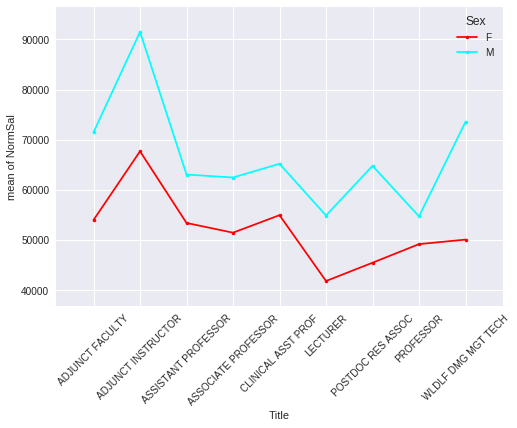

,Eth,Days,Type,NormSal
Sex,,,,
F,1.699552,1948.556054,2.874439,67383.419738
M,1.755319,4043.364780,2.637317,102043.400707


In [159]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

plt.clf()
fig = interaction_plot(data_filter_titles.Title, data_filter_titles.Sex, data_filter_titles.NormSal)
plt.xticks(rotation=45)
plt.show()

data_filter.groupby('Sex').mean()

# Kruskal-Wallis Test

In [168]:
from scipy.stats import kruskal, mannwhitneyu

variables = ['Sex', 'Title', 'Dep', 'Eth', 'Days', 'Type', 'FullPart']
for var in variables:
    grouped = data_filter.groupby(var)
    groups = [grouped.get_group(key).NormSal for key in grouped.groups.keys()]
    print(var, ': ', kruskal(*groups))

print('P-value w/ Bonferroni correction: ', .05/len(variables))

Sex :  KruskalResult(statistic=33.979366066053238, pvalue=5.5699635868725762e-09)
Title :  KruskalResult(statistic=606.33687852205423, pvalue=1.0158393981234177e-125)
Dep :  KruskalResult(statistic=258.94763248014004, pvalue=3.4475947767553718e-52)
Eth :  KruskalResult(statistic=12.718549160592632, pvalue=0.07927013357112199)
Days :  KruskalResult(statistic=519.05656799135943, pvalue=5.655463983867972e-09)
Type :  KruskalResult(statistic=190.30037532863128, pvalue=2.7337944875038192e-43)
FullPart :  KruskalResult(statistic=203.51362431427037, pvalue=3.5736574325782827e-46)
P-value w/ Bonferroni correction:  0.0071428571428571435


In [34]:
var_vals = {variable: [i for i in data_filter[variable].unique()] for variable in variables}

sex_1 = data_filter[data_filter['Sex'] == var_vals['Sex'][0]]
sex_2 = data_filter[data_filter['Sex'] == var_vals['Sex'][1]]

sex_1_grouped = sex_1.groupby('FullPart')
sex_2_grouped = sex_2.groupby('FullPart')
groups = [sex_1_grouped.get_group(key).NormSal for key in sex_1_grouped.groups.keys()] + [sex_2_grouped.get_group(key).NormSal for key in sex_2_grouped.groups.keys()]
print(kruskal(*groups))

KruskalResult(statistic=204.25442327719065, pvalue=5.0798650363043286e-44)


In [179]:
import math

title_vals = data_filter.Title.unique()
bon_p = .05/math.factorial(len(title_vals))
sidak_p = 1- (1-.05)**(1/len(title_vals))

for i in range(len(title_vals)):
    for j in range(i+1, len(title_vals)):
        g1 = data_filter[data_filter.Title == title_vals[i]].NormSal
        g2 = data_filter[data_filter.Title == title_vals[j]].NormSal
        stat, p = mannwhitneyu(g1, g2)
        if p < bon_p:
            print(title_vals[i], ' / ', title_vals[j], ' ', p)
        elif p < sidak_p:
            print('*', title_vals[i], ' / ', title_vals[j], ' ', p)
        else:
            print('---', title_vals[i], ' / ', title_vals[j], ' ', p)

ADJUNCT INSTRUCTOR  /  ASSOCIATE PROFESSOR   7.40048212785e-16
ADJUNCT INSTRUCTOR  /  PROFESSOR   1.01236343094e-18
ADJUNCT INSTRUCTOR  /  ASSISTANT PROFESSOR   4.7669017911e-15
* ADJUNCT INSTRUCTOR  /  WLDLF DMG MGT TECH   2.4261722774e-07
ADJUNCT INSTRUCTOR  /  CLINICAL ASST PROF   2.73044768007e-15
* ADJUNCT INSTRUCTOR  /  LECTURER   3.78951603944e-07
ADJUNCT INSTRUCTOR  /  POSTDOC RES ASSOC   4.08636130888e-10
--- ADJUNCT INSTRUCTOR  /  ADJUNCT FACULTY   0.0254289763912
ASSOCIATE PROFESSOR  /  PROFESSOR   6.07515483267e-09
* ASSOCIATE PROFESSOR  /  ASSISTANT PROFESSOR   0.00194731540406
ASSOCIATE PROFESSOR  /  WLDLF DMG MGT TECH   6.84897015173e-31
ASSOCIATE PROFESSOR  /  CLINICAL ASST PROF   1.68426017189e-19
ASSOCIATE PROFESSOR  /  LECTURER   3.60767785477e-14
ASSOCIATE PROFESSOR  /  POSTDOC RES ASSOC   5.79726852401e-29
ASSOCIATE PROFESSOR  /  ADJUNCT FACULTY   2.03281327703e-22
PROFESSOR  /  ASSISTANT PROFESSOR   9.19994018263e-15
PROFESSOR  /  WLDLF DMG MGT TECH   2.9450095656

In [180]:
dep_vals = data_filter.Dep.unique()
bon_p = .05/math.factorial(len(dep_vals))
sidak_p = 1- (1-.05)**(1/len(dep_vals))

for i in range(len(dep_vals)):
    for j in range(i+1, len(dep_vals)):
        g1 = data_filter[data_filter.Dep == dep_vals[i]].NormSal
        g2 = data_filter[data_filter.Dep == dep_vals[j]].NormSal
        stat, p = mannwhitneyu(g1, g2)
#         stat, p = kruskal(g1, g2)
        if p < bon_p:
            print(dep_vals[i], ' / ', dep_vals[j], ' ', p)
        elif p < sidak_p:
            print('*', dep_vals[i], ' / ', dep_vals[j], ' ', p)
        else:
            print('---', dep_vals[i], ' / ', dep_vals[j], ' ', p)

MATHEMATICS  /  WILDLIFE SERVICES   6.10558468301e-23
MATHEMATICS  /  COLLEGE OF NURSING   2.0008890421e-12
--- MATHEMATICS  /  PHYSICS & ASTRONOMY   0.485356167351
MATHEMATICS  /  QATAR CAMPUS   1.17810864411e-08
* MATHEMATICS  /  CHEMISTRY   0.000419669139133
--- MATHEMATICS  /  HEALTH & KINESIOLOGY   0.357796947176
--- MATHEMATICS  /  CLA FACULTY   0.387839976415
* WILDLIFE SERVICES  /  COLLEGE OF NURSING   0.00487474796264
WILDLIFE SERVICES  /  PHYSICS & ASTRONOMY   1.208748723e-22
WILDLIFE SERVICES  /  QATAR CAMPUS   1.61656539375e-30
WILDLIFE SERVICES  /  CHEMISTRY   4.90390654741e-26
WILDLIFE SERVICES  /  HEALTH & KINESIOLOGY   3.73439004689e-16
WILDLIFE SERVICES  /  CLA FACULTY   2.20251276732e-13
COLLEGE OF NURSING  /  PHYSICS & ASTRONOMY   2.58791463667e-10
COLLEGE OF NURSING  /  QATAR CAMPUS   1.31789491863e-19
* COLLEGE OF NURSING  /  CHEMISTRY   0.00134754438048
COLLEGE OF NURSING  /  HEALTH & KINESIOLOGY   3.94240974352e-09
COLLEGE OF NURSING  /  CLA FACULTY   4.406028034

extended abstract at the top
short paragraph on methods
summary of results
high-level conclusions - reccomendations
parametric work in appendix

look through links and add to folder
read certain chapters over break
get a sense for optimization theory vs application vs systems theory
